In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_E6oV3lV.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
# find sentences(if any) containing HTML tags
import re
i=0;
for sent in df['tweet'].values:
    if (len(re.findall('<.*?>', sent))):
        print sent
        break;
    i += 1;    

        

In [7]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print stop

set([u'all', u'just', u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'o', u'hadn', u'herself', u'll', u'had', u'should', u'to', u'only', u'won', u'under', u'ours', u'has', u'do', u'them', u'his', u'very', u'they', u'not', u'during', u'now', u'him', u'nor', u'd', u'did', u'didn', u'this', u'she', u'each', u'further', u'where', u'few', u'because', u'doing', u'some', u'hasn', u'are', u'our', u'ourselves', u'out', u'what', u'for', u'while', u're', u'does', u'above', u'between', u'mustn', u't', u'be', u'we', u'who', u'were', u'here', u'shouldn', u'hers', u'by', u'on', u'about', u'couldn', u'of', u'against', u's', u'isn', u'or', u'own', u'into', u'yourself', u'down', u'mightn', u'wasn', u'your', u'from', u'her', u'their', u'aren', u'there', u'been', u'whom', u'too', u'wouldn', u'themselves', u'weren', u'was', u'until', u'more', u'himself', u'that', u'but', u'don', u'with', u'than', u'those', u'he', u'me', u'myself', u'ma', u'these', u'up', u'will', u'below', u'ain

In [8]:
stop.discard('not')

In [9]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stop) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags(if any)
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

print(sno.stem('blowing'))

blow


In [ ]:
#preprocessing tweets

In [10]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in df['tweet'].values:
    filtered_sentence=[]
    
    sent=cleanhtml(sent) # remove HTMl tags
    for word in sent.split():
        for cleaned_words in cleanpunc(word).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (df['label'].values)[i] == 1: 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(df['label'].values)[i] == 0:
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [11]:
df['CleanedTweet']=final_string

In [13]:
df.head(10)

,id,label,tweet,CleanedTweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love take time
4,5,0,factsguide: society now #motivation,societi motiv
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talk leav chao pay disput ge...
6,7,0,@user camping tomorrow @user @user @user @use...,camp tomorrow
7,8,0,the next school year is the year for exams.ð...,next school year year exam cant think school e...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cav champion cleveland clevela...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcom


In [59]:
#applying BOW

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,3) ) #in scikit-learn
final_bigram_counts = count_vect.fit_transform(df['CleanedTweet'].values)

In [15]:
final_bigram_counts.get_shape()

(31962, 306008)

In [16]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100,n_iter=5)
svd_data = svd.fit_transform(final_bigram_counts)

In [17]:
svd_data.shape

(31962, 100)

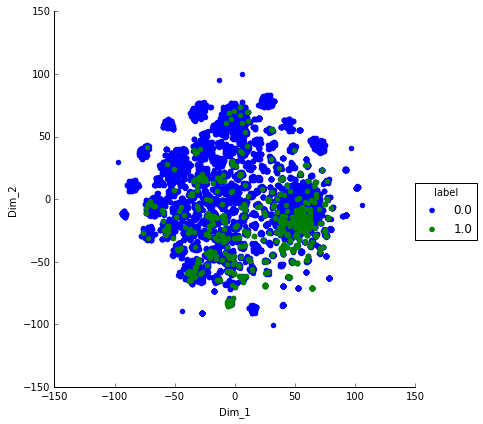

In [61]:
from sklearn.manifold import TSNE

# Picking only 10k points TSNE takes a lot of time for ~32k points
data_10k = svd_data[0:10000,:]
labels_10k = df.label[0:10000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_10k)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_10k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [18]:
#forming new dataframe with 100 dimension obtained by svd as features.
NEW_df = np.vstack((svd_data.T, df.label)).T
NEW_df = pd.DataFrame(data=NEW_df)

In [19]:
NEW_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.255260,-0.014828,-0.283188,-0.064628,-0.015186,-0.116501,0.072926,-0.003340,-0.020976,0.002634,...,-0.035363,-0.062783,-0.155302,-0.040407,0.040001,0.016231,0.041430,0.105714,0.010593,0.0
1,0.194021,-0.003718,-0.035412,0.850970,-0.017293,0.027285,0.003379,0.095277,0.259192,-0.004903,...,0.048942,0.023994,-0.022337,-0.031836,-0.009526,0.057994,0.092733,-0.027659,-0.031613,0.0
2,0.055608,-0.002627,-0.011024,0.011236,0.002843,0.110409,-0.085633,-0.035300,-0.018370,-0.061986,...,-0.019598,0.001176,-0.011132,-0.012831,0.012972,0.002879,0.000412,0.000969,0.010443,0.0
3,1.443400,-0.079882,1.781688,-0.293210,-0.078841,-0.898872,0.662405,0.102698,0.124810,-1.440517,...,0.020006,-0.013847,-0.024297,-0.017375,0.012278,-0.005350,0.013592,0.010216,0.005523,0.0
4,0.009450,-0.000218,0.001095,0.003777,0.001800,0.009772,-0.006672,0.001000,0.001385,0.002647,...,0.009653,0.020289,0.012449,-0.008024,0.019483,0.016260,0.024625,-0.041926,-0.002271,0.0


In [20]:
NEW_df[100].value_counts()

0.0    29720
1.0     2242
Name: 100, dtype: int64

In [21]:
#upsampling process to equals no of label category...
from sklearn.utils import resample
majority = NEW_df[NEW_df[100]==0]
minority = NEW_df[NEW_df[100]==1]
 
# Upsample minority class
minority_upsampled = resample(minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=29720,    # to match majority class
                                 ) # reproducible results
 
# Combine majority class with upsampled minority class
NEW_df = pd.concat([majority, minority_upsampled])
 
# Display new class counts
NEW_df[100].value_counts()


1.0    29720
0.0    29720
Name: 100, dtype: int64

In [22]:
NEW_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.255260,-0.014828,-0.283188,-0.064628,-0.015186,-0.116501,0.072926,-0.003340,-0.020976,0.002634,...,-0.035363,-0.062783,-0.155302,-0.040407,0.040001,0.016231,0.041430,0.105714,0.010593,0.0
1,0.194021,-0.003718,-0.035412,0.850970,-0.017293,0.027285,0.003379,0.095277,0.259192,-0.004903,...,0.048942,0.023994,-0.022337,-0.031836,-0.009526,0.057994,0.092733,-0.027659,-0.031613,0.0
2,0.055608,-0.002627,-0.011024,0.011236,0.002843,0.110409,-0.085633,-0.035300,-0.018370,-0.061986,...,-0.019598,0.001176,-0.011132,-0.012831,0.012972,0.002879,0.000412,0.000969,0.010443,0.0
3,1.443400,-0.079882,1.781688,-0.293210,-0.078841,-0.898872,0.662405,0.102698,0.124810,-1.440517,...,0.020006,-0.013847,-0.024297,-0.017375,0.012278,-0.005350,0.013592,0.010216,0.005523,0.0
4,0.009450,-0.000218,0.001095,0.003777,0.001800,0.009772,-0.006672,0.001000,0.001385,0.002647,...,0.009653,0.020289,0.012449,-0.008024,0.019483,0.016260,0.024625,-0.041926,-0.002271,0.0


In [23]:
X = NEW_df.iloc[:,:-1].values
y = NEW_df.iloc[:,-1].values

In [24]:
X.shape , y.shape

((59440, 100), (59440,))

Due to upsampling datapoints belong to category label '0' and '1' are not randomized instead np.array X contains first all 0 category datapoints and then 1 category datapoints 
hence in order to randomized it, so that X_train & X_test consist of equal no of both 0 & 1 labelled points 
We can split X in such a way as tried below

In [25]:
n_train = int(X.shape[0]*0.7)
index_tr = np.random.choice(X.shape[0], n_train, replace=False) 

index_te = []
for i in range(X.shape[0]):
    if i not in index_tr:
        index_te.append(i)
    else:
        continue
        
index_te = np.array(index_te)

In [26]:
print index_tr.shape , index_te.shape

(41608,) (17832,)


In [27]:
X_train = X[index_tr]
y_train = y[index_tr]
X_test = X[index_te]
y_test = y[index_te]

In [28]:
print X_train.shape, y_train.shape, X_test.shape , y_test.shape

(41608, 100) (41608,) (17832, 100) (17832,)


In [29]:
#feature scaling using standarization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [30]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 20839, 1.0: 20769}

In [31]:
X_train_pos = []
X_train_neg = []
y_train_pos = []
y_train_neg = []

for i in range(y_train.shape[0]):
    if y_train[i] == 0 :
        X_train_neg.append(X_train[i])
        y_train_neg.append(y_train[i])
    elif y_train[i] ==1:
        X_train_pos.append(X_train[i])
        y_train_pos.append(y_train[i])
        

        
X_train_pos = np.array(X_train_pos)
X_train_neg = np.array(X_train_neg)
y_train_pos = np.array(y_train_pos)
y_train_neg = np.array(y_train_neg)
        

In [32]:
# applying  lof on pos(1) labelled points
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
pred_lof_pos = lof.fit_predict(X_train_pos)


In [33]:
# counting no of outlier
unique, counts = np.unique(pred_lof_pos, return_counts=True)
dict(zip(unique, counts))

{-1: 2082, 1: 18687}

In [34]:
# removing outlier
X_tr_pos = []
y_tr_pos = []
for i in range(X_train_pos.shape[0]):
    if pred_lof_pos[i] == 1:
        X_tr_pos.append(X_train_pos[i])
        y_tr_pos.append(y_train_pos[i])
    else:
        continue
        
X_tr_pos = np.array(X_tr_pos)
y_tr_pos = np.array(y_tr_pos)


In [35]:
#applying lof on negative(0) labelled points
pred_lof_neg = lof.fit_predict(X_train_neg)

In [36]:
# counting no of outliers in negative points
unique, counts = np.unique(pred_lof_neg, return_counts=True)
dict(zip(unique, counts))

{-1: 2084, 1: 18755}

In [37]:
#removing negative type outlier
X_tr_neg = []
y_tr_neg = []
for i in range(X_train_neg.shape[0]):
    if pred_lof_neg[i] == 1:
        X_tr_neg.append(X_train_neg[i])
        y_tr_neg.append(y_train_neg[i])
    else:
        continue
        
X_tr_neg = np.array(X_tr_neg)
y_tr_neg = np.array(y_tr_neg)


In [38]:
print X_tr_neg.shape , y_tr_neg.shape

(18755, 100) (18755,)


In [39]:
# concatenation after outlier removal to form X_train
X_train = np.concatenate((X_tr_pos,X_tr_neg) , axis =0)
y_train = np.concatenate((y_tr_pos,y_tr_neg), axis =0)

In [40]:
print X_train.shape , y_train.shape

(37442, 100) (37442,)


In [46]:
from sklearn.linear_model import LogisticRegression
lrc  = LogisticRegression()
lrc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
pred = lrc.predict(X_test)
accuracy_score(y_test, pred) * 100

78.20771646478242

In [55]:
# using rfe for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
log_rfe = LogisticRegression()

rfe = RFE(log_rfe, 80)
rfe = rfe.fit(X_train, y_train)

In [56]:
X_tr = rfe.fit_transform(X_train , y_train)
X_te = rfe.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression
lrc  = LogisticRegression()
lrc.fit(X_tr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
pred = lrc.predict(X_te)
accuracy_score(y_test, pred) * 100

78.07873485868102